# Нейронні мережі. Регресія. Вартість житла

Курс: "Математичне моделювання в R"

---

У цій лекції ми скористаємося набором даних Boston: вартість житла у пригородах Бостона

## Dataset description

In [1]:
# install.packages("MASS")
# install.packages("neuralnet")
# install.packages("clusterGeneration")
# install.packages("devtools")
# install.packages("caTools")
# install.packages("reshape")
# install.packages("Metrics")
# install.packages("nnet")
#install.packages("plyr")
#install.packages("boot")

`medv` is TARGET!

In [2]:
library(MASS)
?Boston

Boston {MASS},R Documentation


Переглянемо дані:

In [3]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


## Data visualization

Lets move our dataset to special variable:

In [5]:
data <- Boston
head(data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Let's check a correlation between parameters: 

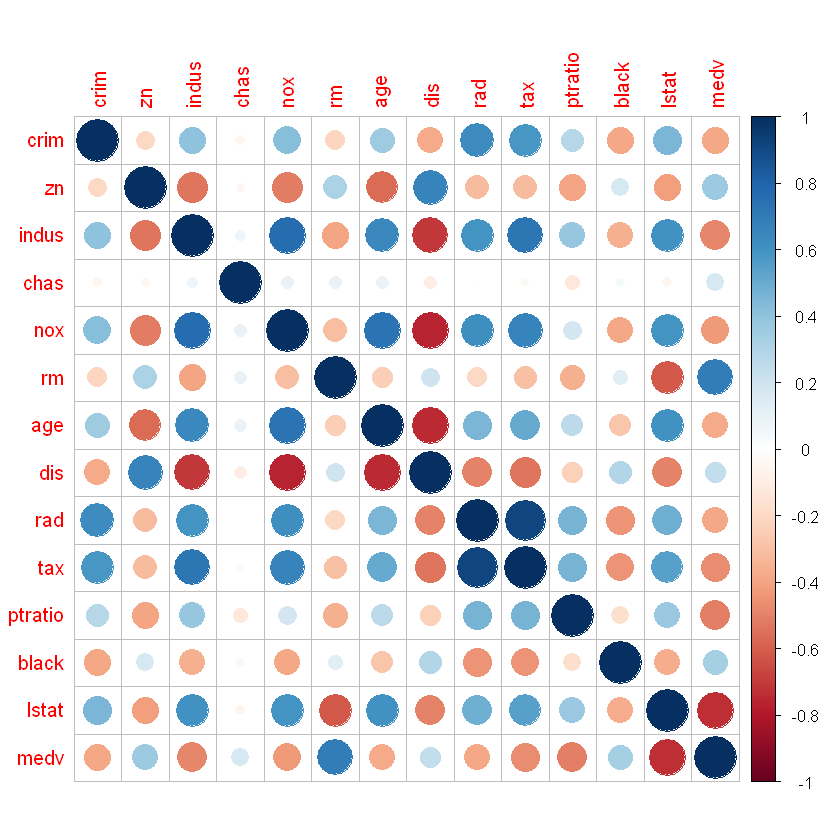

In [6]:
suppressMessages(library(corrplot))
corrplot(cor(data))

Rad and tax has highest correlation: 0.91

- [x] `rad` - index of accessibility to radial highways.
- [x] `tax` - full-value property-tax rate per $10,000.

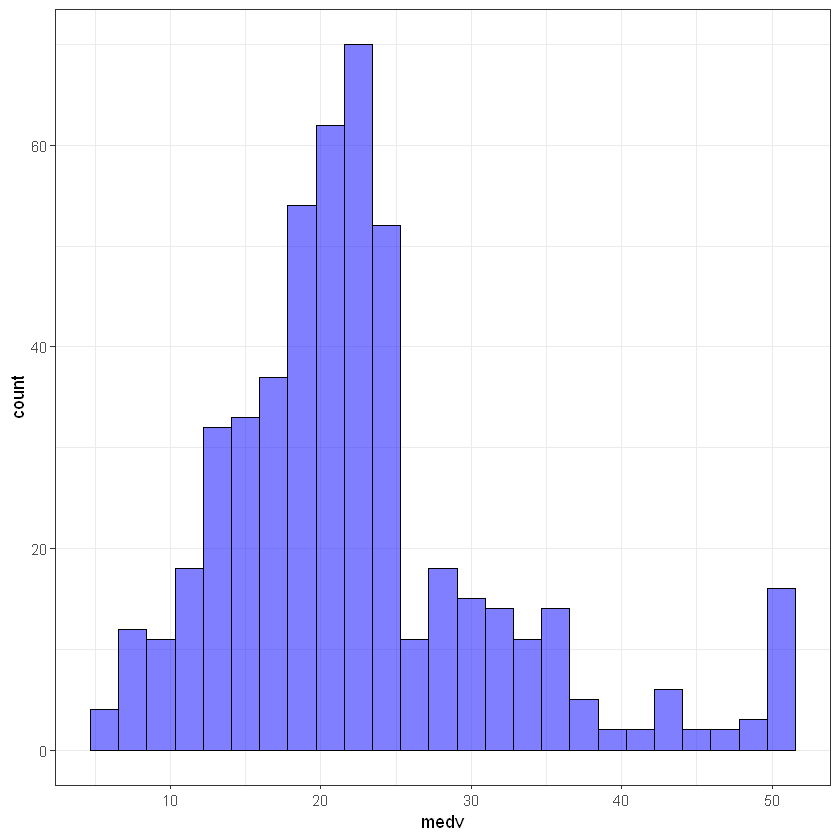

In [7]:
library(ggplot2)

ggplot(data, aes(medv)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

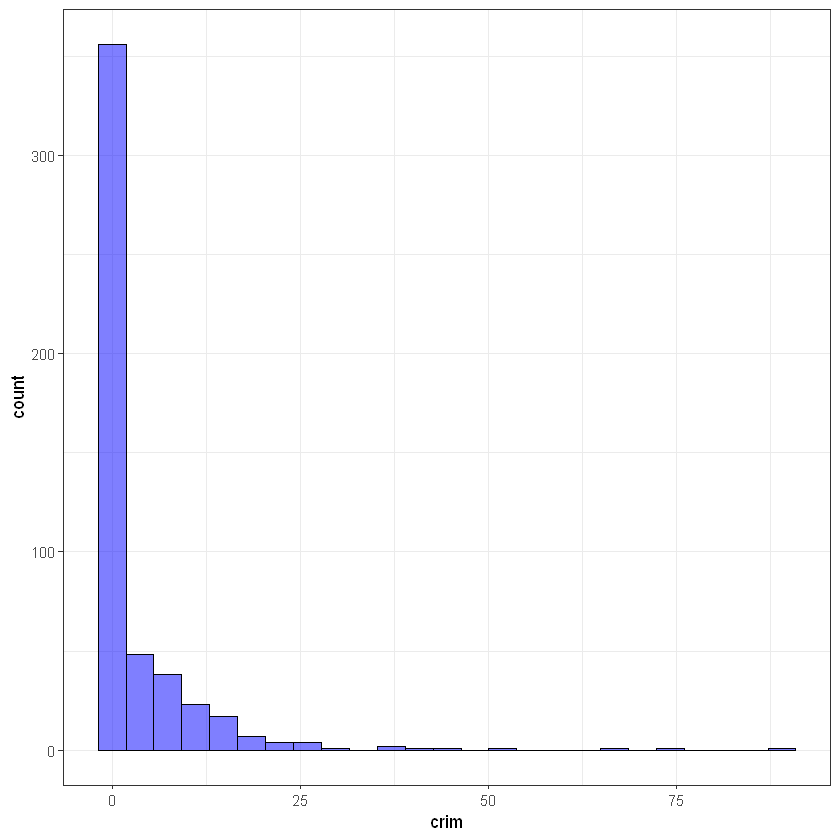

In [8]:
#crim
ggplot(data, aes(crim)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

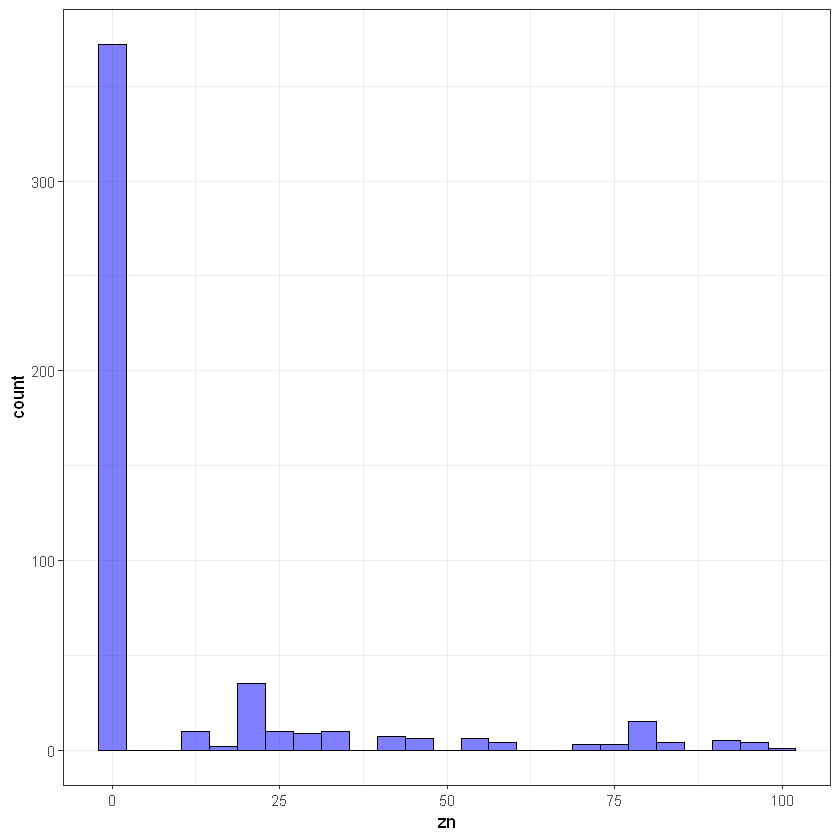

In [9]:
#zn
ggplot(data, aes(zn)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

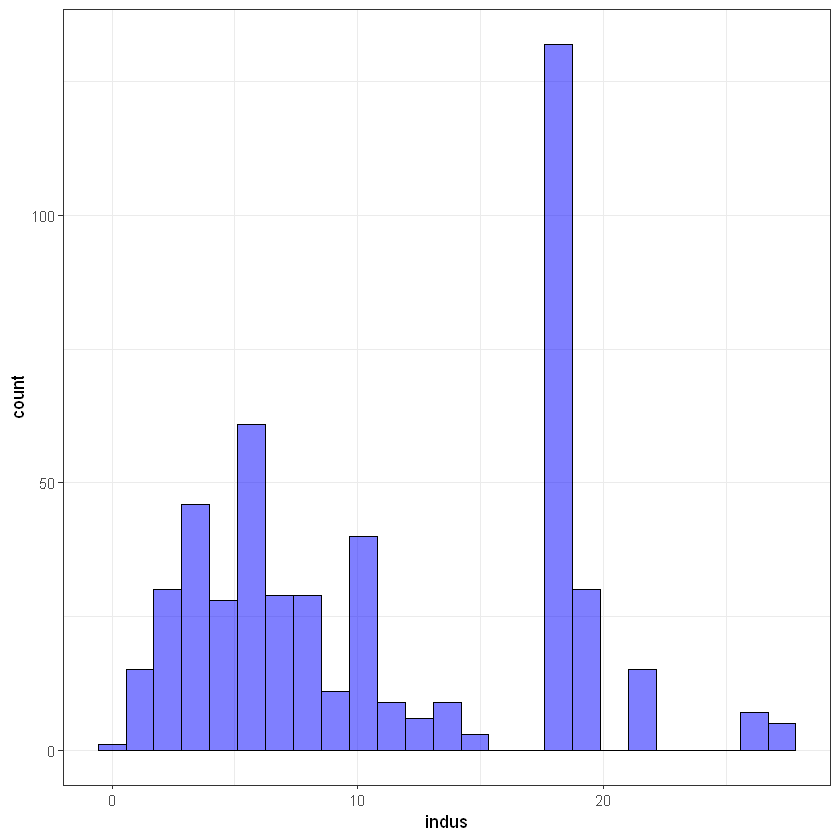

In [10]:
#indus
ggplot(data, aes(indus)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

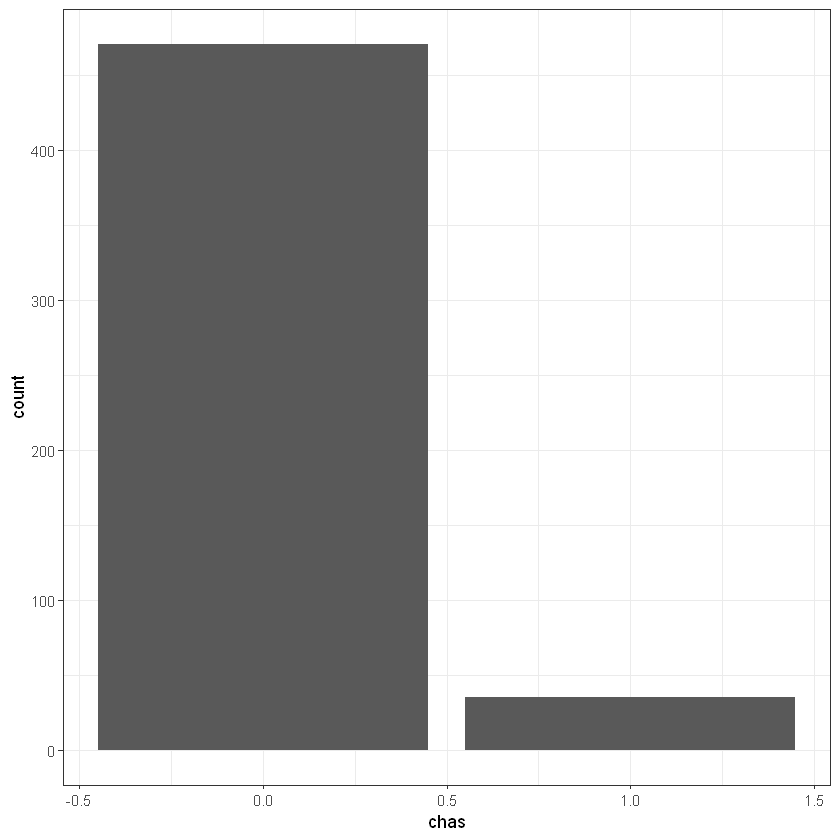

In [11]:
#chas 
ggplot(data, aes(chas)) + 
    geom_bar(aes(fill = chas)) + 
    theme_bw()

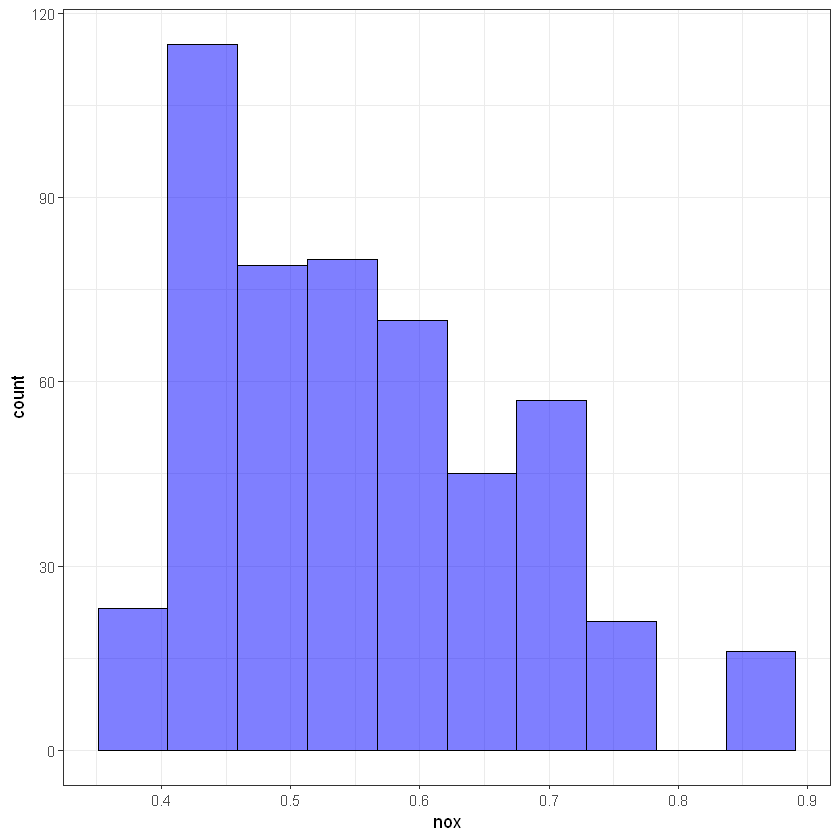

In [12]:
# nox
ggplot(data, aes(nox)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

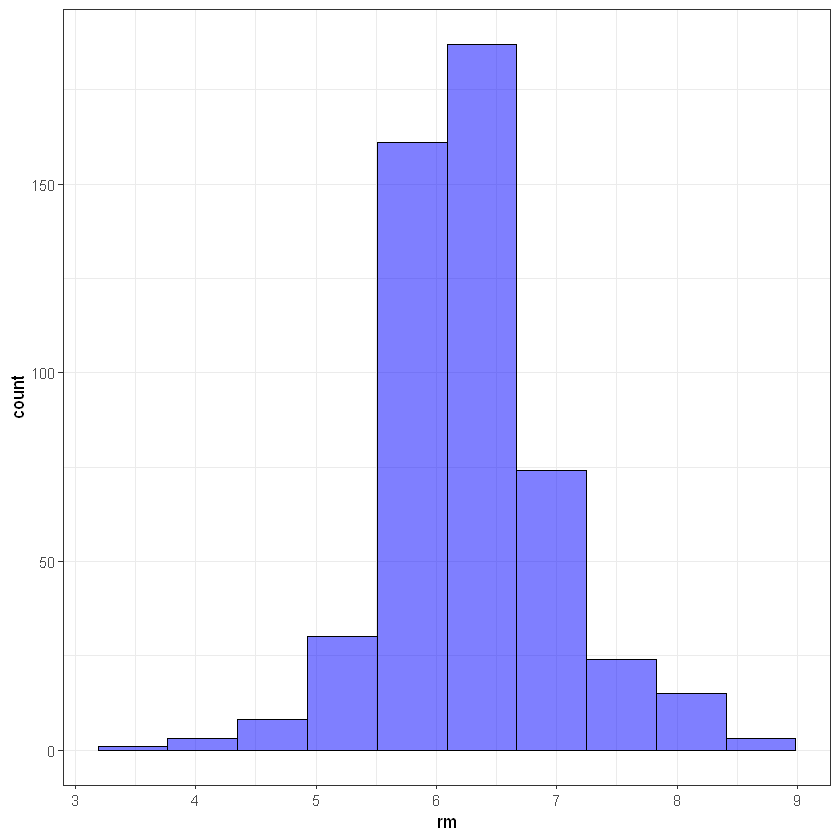

In [13]:
# rm
ggplot(data, aes(rm)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

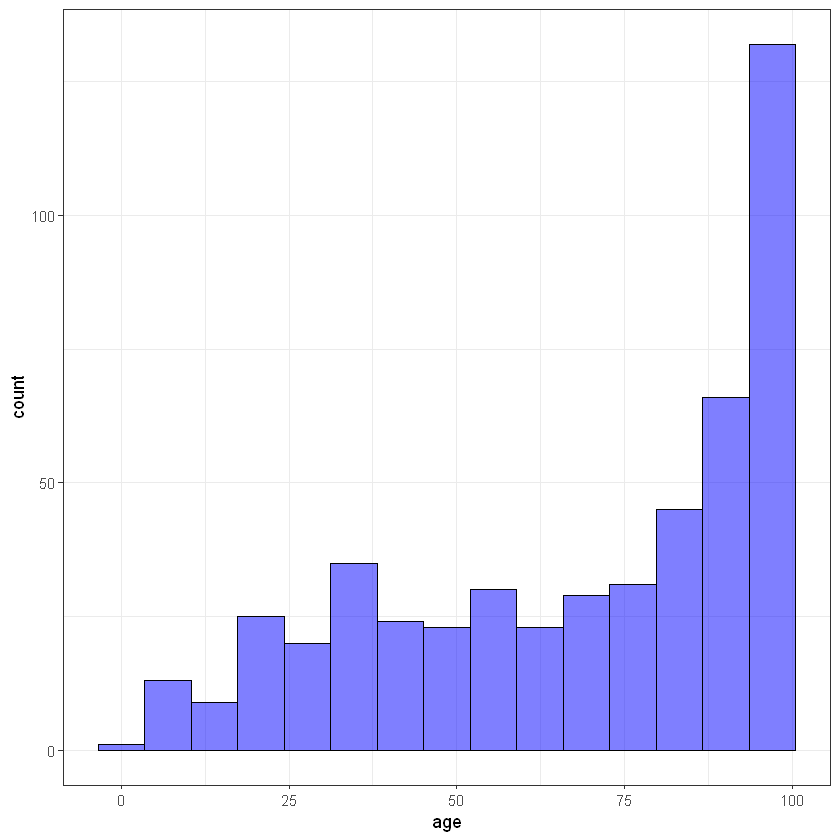

In [14]:
# age
ggplot(data, aes(age)) + 
    geom_histogram(bins = 15, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

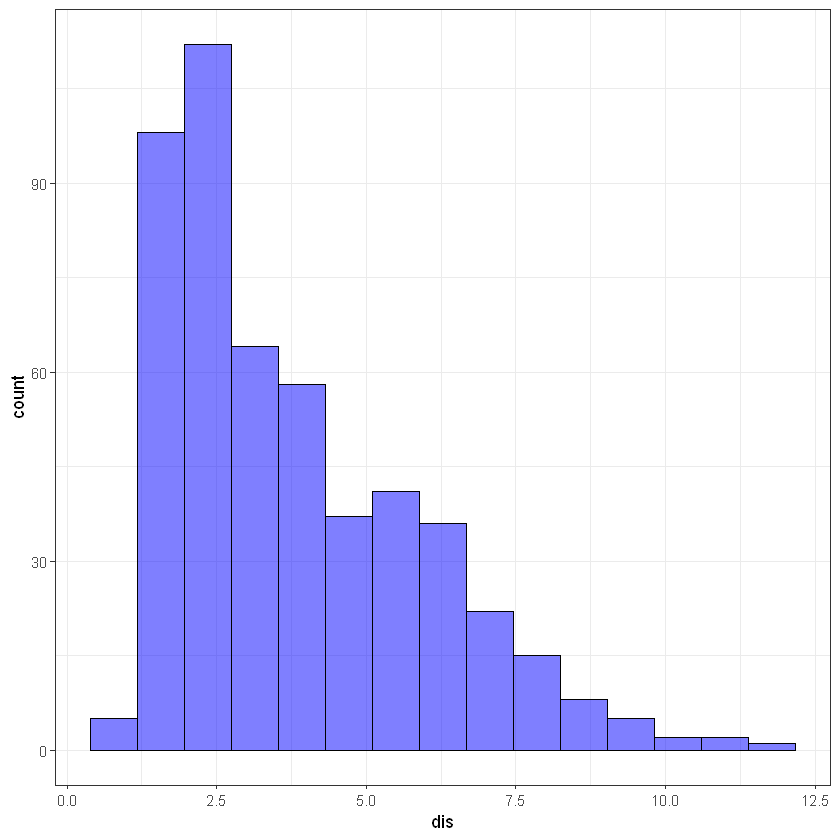

In [15]:
# dis
ggplot(data, aes(dis)) + 
    geom_histogram(bins = 15, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

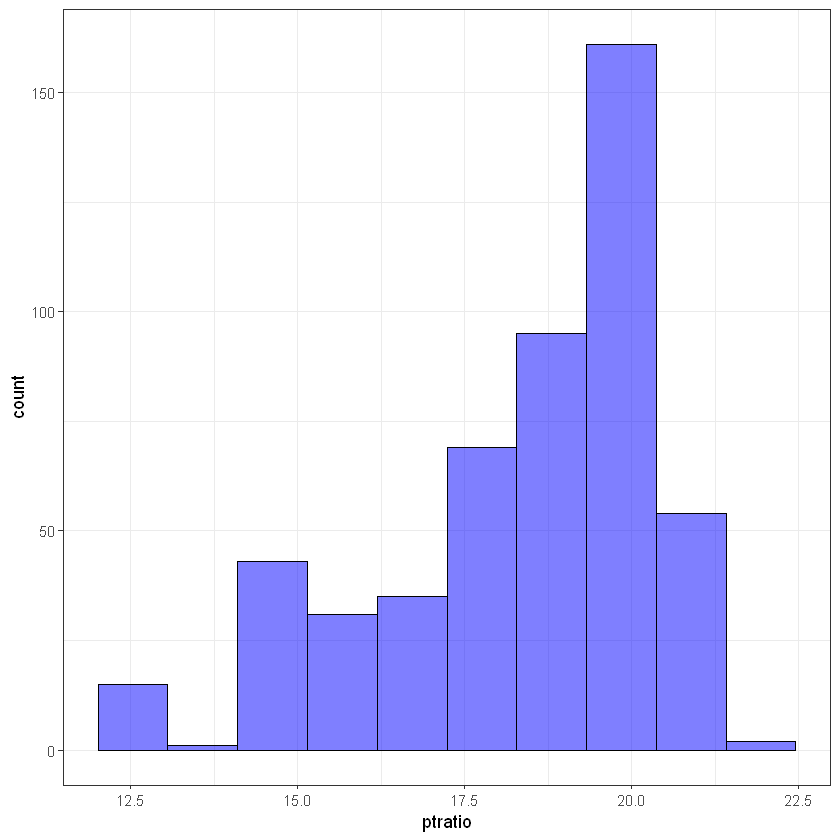

In [16]:
#rad
ggplot(data, aes(ptratio)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

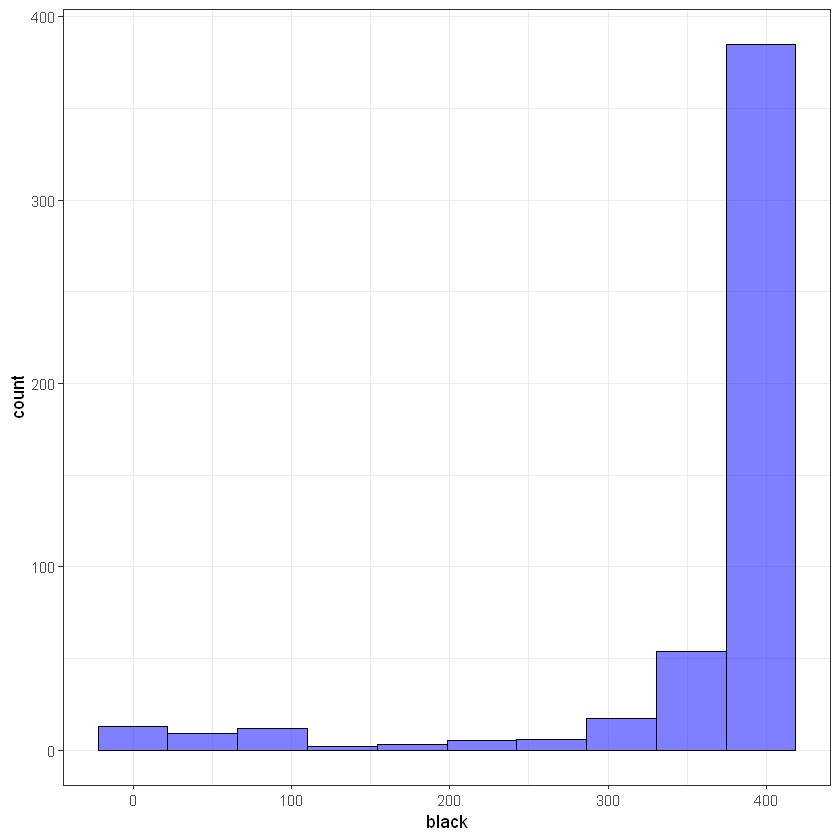

In [17]:
# black
ggplot(data, aes(black)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

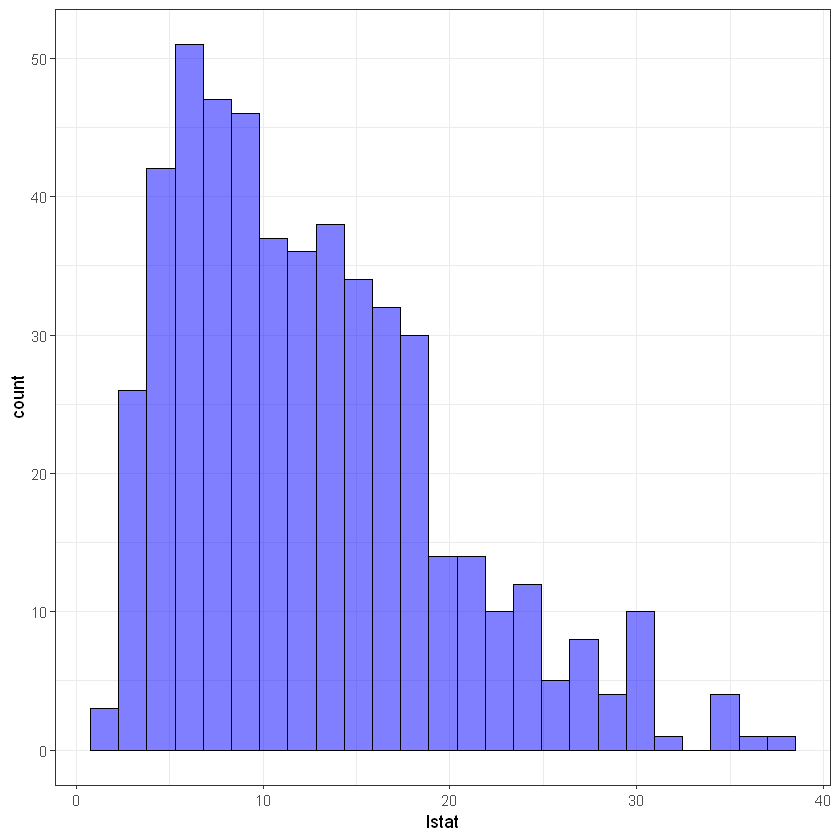

In [18]:
# lstat
ggplot(data, aes(lstat)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

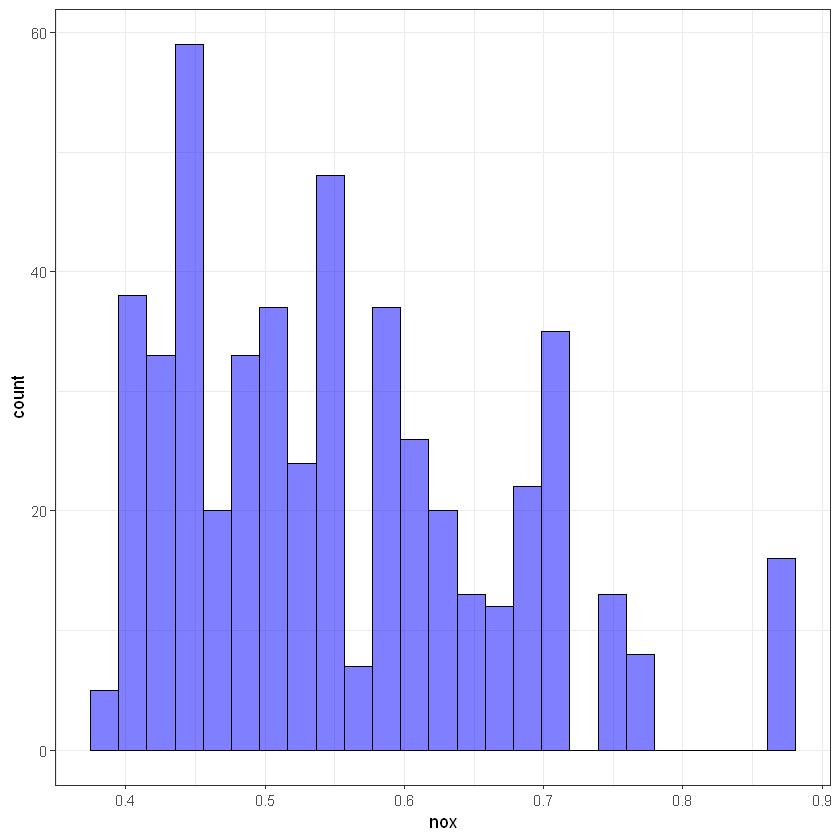

In [19]:
# nox
ggplot(data, aes(nox)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

---

## Data scaling

Для роботи з нейромережами хорошою практикою є нормалізація даних перед використанням. Скористаємося формулою $(X-Xmin)/(Xmax-Xmin)$.

Визначимо мінімальні та максимальні значення по факторах:

In [20]:
suppressMessages(library(dplyr))

In [21]:
normalizeData <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [22]:
revertData <- function(scaled, original) {
    return (scaled * (max(original) - min(original)) + min(original))    
}

In [23]:
data %>% head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Нормалізуємо значення за один раз у всьому датафреймі.

Переглянемо як змінився вигляд значень:

In [24]:
scaled_data <- sapply(X = data, FUN = normalizeData) %>% as.data.frame() 
scaled_data %>% head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
2,0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
3,0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
4,0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
5,0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
6,0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


In [25]:
re_data <- sapply(X = scaled_data$medv, original = data$medv, FUN = revertData) %>% as.data.frame() 
re_data %>% head()

,.
,<dbl>
1,24.0
2,21.6
3,34.7
4,33.4
5,36.2
6,28.7


---

## Train/test split

Сформуємо вибірки з пропорцією 70/30 % значень:

In [26]:
library(caTools)
set.seed(2023)
split <- sample.split(scaled_data$medv, SplitRatio = 0.7)
train_data <- subset(scaled_data, split)
test_data <- subset(scaled_data, !split)

Let's check how target's are distrubuted in both samples:

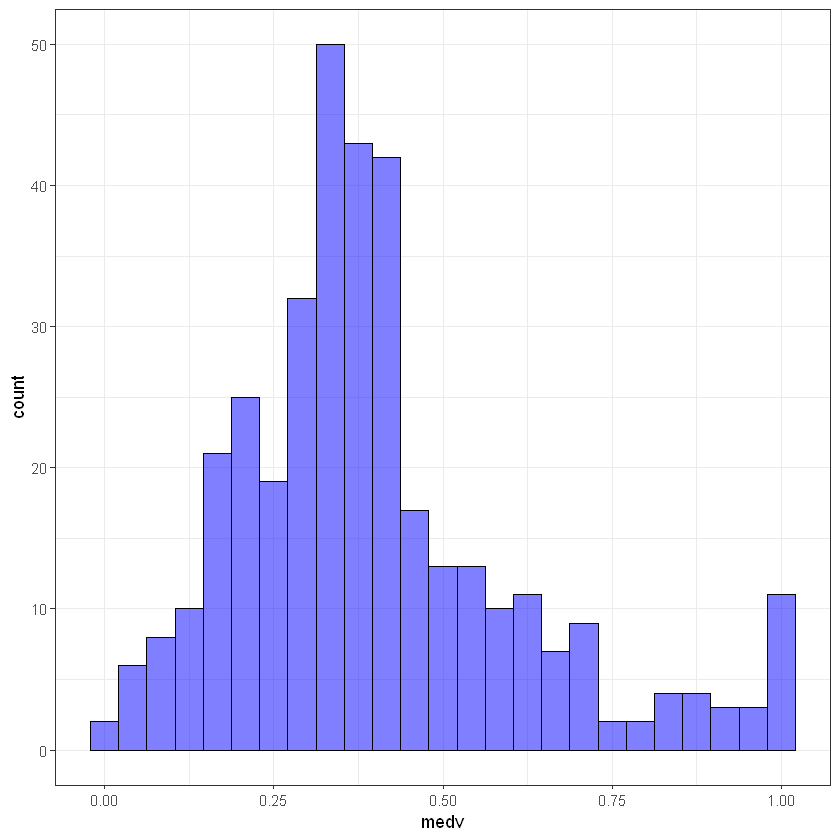

In [27]:
# train
ggplot(train_data, aes(medv)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

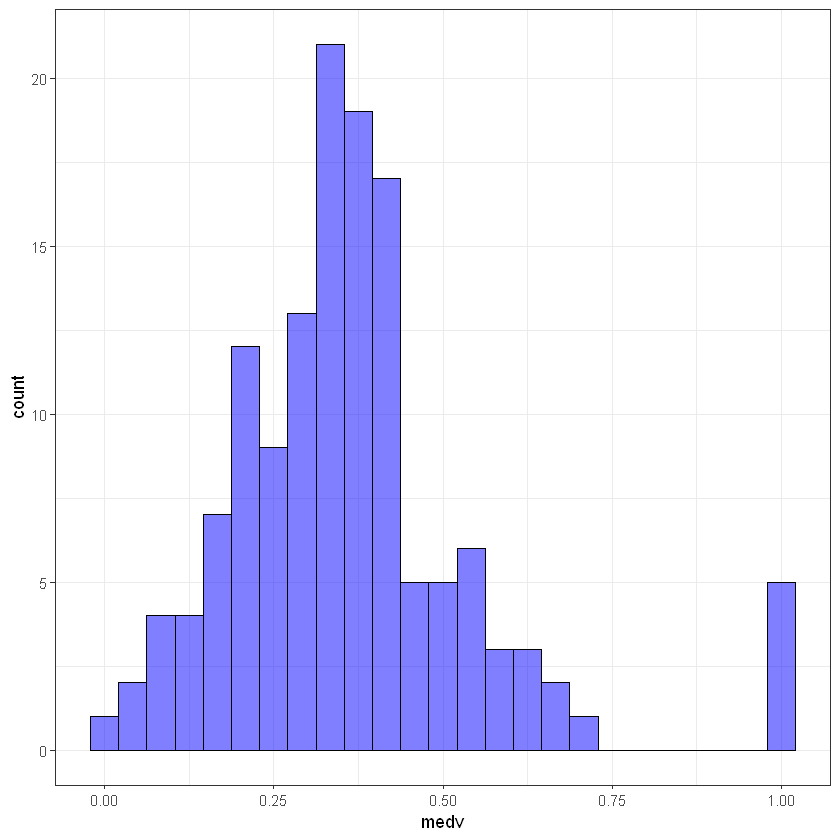

In [28]:
# test
ggplot(test_data, aes(medv)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

---

## Baseline (Linear regression)

Для порівняння ефективності використання нейронних мереж скористаємося для початку лінійною регресією:

In [29]:
lm_model <- lm(medv ~ ., data = train_data)
summary(lm_model)


Call:
lm(formula = medv ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24556 -0.06405 -0.01292  0.04494  0.59898 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.49370    0.06281   7.860 4.70e-14 ***
crim        -0.14725    0.15139  -0.973 0.331410    
zn           0.08336    0.03588   2.323 0.020751 *  
indus        0.01499    0.04469   0.335 0.737541    
chas         0.01520    0.02281   0.667 0.505425    
nox         -0.18674    0.05028  -3.714 0.000237 ***
rm           0.48617    0.05571   8.727  < 2e-16 ***
age         -0.01314    0.03207  -0.410 0.682344    
dis         -0.36140    0.05961  -6.063 3.43e-09 ***
rad          0.14625    0.04369   3.347 0.000905 ***
tax         -0.14304    0.05333  -2.682 0.007655 ** 
ptratio     -0.21909    0.03199  -6.850 3.30e-11 ***
black        0.07181    0.02898   2.478 0.013692 *  
lstat       -0.41460    0.04909  -8.446 7.94e-16 ***
---
Signif. codes:  0 '***' 0.001 '**

Здійснимо прогноз тестових значень:

In [30]:
test_lm_predicted_scaled <- predict(lm_model, test_data)
head(test_lm_predicted_scaled)

1         5        20        29        30        35 
0.5679243 0.5231117 0.2950730 0.3236024 0.3559317 0.1959985

In [31]:
test_lm_predicted <- sapply(X = test_lm_predicted_scaled, original = data$medv, FUN = revertData) %>% as.data.frame()
head(test_lm_predicted)

,.
,<dbl>
1,30.55659
5,28.54003
20,18.27829
29,19.56211
30,21.01693
35,13.81993


Let's check errors and R^2:

In [32]:
library(modelr)
# need for next comparison
linear_err <- data.frame(  
  R2_train = round(modelr::rsquare(lm_model, data = train_data), 4),
  R2_test = round(modelr::rsquare(lm_model, data = test_data), 4),
  MSE_test = round(modelr::mse(lm_model, data = test_data), 4),
  RMSE_test = round(modelr::rmse(lm_model, data = test_data), 4) 
)

rownames(linear_err) <- c("linear")
linear_err

,R2_train,R2_test,MSE_test,RMSE_test
,<dbl>,<dbl>,<dbl>,<dbl>
linear,0.7566,0.6611,0.0117,0.1081


---

## Побудова нейромережі за допомогою `neuralnet`

Підключаємо пакет neuralnet:

In [33]:
suppressMessages(library(neuralnet))


Attaching package: 'neuralnet'


The following object is masked from 'package:dplyr':

    compute




Для побудови моделі потрібно згенерувати формулу у форматі $y ~ x_1 + x_2 + ... + x_n$

In [34]:
n <- colnames(data)
n <- n[!n %in% "medv"]
formula <- as.formula(paste("medv ~", paste(n, collapse = " + ")))
formula

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

Будуємо модель за допомогою фунуції `neuralnet()`:

`hidden = c(3,4)` - перший прихований шар буде мати 3 нейрони, другий 4
`linear.output` - вихідний показник неперервне число. Не класифікація

In [35]:
nn_model <- neuralnet(formula = formula, data = train_data, hidden = c(3,4), linear.output = TRUE, rep = 1)

Візуалізуємо модель:

In [36]:
plot(nn_model)

In [37]:
train_data %>% head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.0002359225,0.000,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
3,0.0002356977,0.000,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
4,0.0002927957,0.000,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
6,0.0002644715,0.000,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667
7,0.0009213230,0.125,0.27162757,0,0.2860082,0.4696302,0.6560247,0.4029226,0.17391304,0.23664122,0.2765957,0.9967220,0.29525386,0.3977778
8,0.0015536719,0.125,0.27162757,0,0.2860082,0.5002874,0.9598352,0.4383872,0.17391304,0.23664122,0.2765957,1.0000000,0.48068433,0.4911111


Також для візуалізація можна скористатися функцією `plot.nnet()`, опубілкованою на відкритому ресурсі одним із користувачів мережі Інтернет:

In [38]:
suppressMessages(library(devtools))

In [39]:
library(clusterGeneration)

In [40]:
suppressMessages(source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r'))

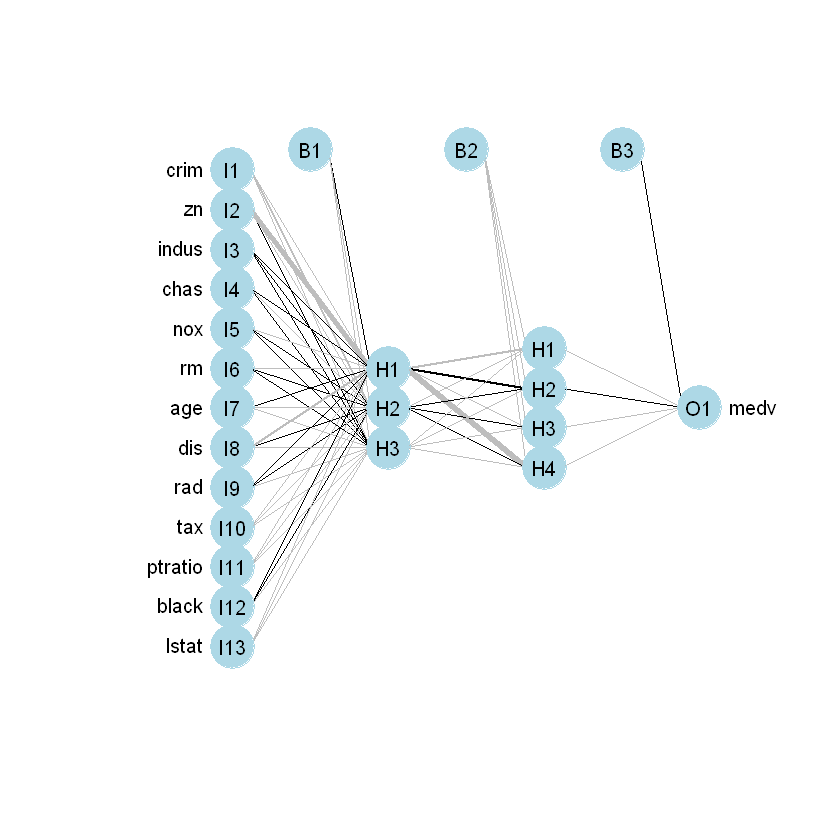

In [41]:
suppressMessages(plot.nnet(nn_model))

Preview neural network matrix as text:

In [42]:
nn_model$result.matrix %>% head()

error,5.182582e-01
reached.threshold,9.322212e-03
steps,3.503000e+03
Intercept.to.1layhid1,5.249092e-01
crim.to.1layhid1,-2.880638e+00
zn.to.1layhid1,-9.485175e+01


Здійснимо прогноз для тестової вибірки та повернемо значення до базового виміру:

In [43]:
test_predicted_scaled <- compute(nn_model, test_data%>%select(-medv))

Convert `$net.result` to original form:

In [44]:
test_nn_predicted <- sapply(X = test_predicted_scaled$net.result, original = data$medv, FUN = revertData) %>% as.data.frame()
head(test_nn_predicted)

,.
,<dbl>
1,28.74649
2,31.34932
3,18.86595
4,18.92882
5,19.89660
6,11.69719


Порівняємо похибки та $R^2$ по лінійній регресії та першій нейронній мережі:

In [45]:
head(test_data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
5,0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
20,0.0080867817,0.00,0.28152493,0,0.3148148,0.4150220,0.6858908,0.2425138,0.13043478,0.22900763,0.8936170,0.9849967,0.26352097,0.2933333
29,0.0086171860,0.00,0.28152493,0,0.3148148,0.5621767,0.9423275,0.3023670,0.13043478,0.22900763,0.8936170,0.9774068,0.30546358,0.2977778
30,0.0111962610,0.00,0.28152493,0,0.3148148,0.5964744,0.8692070,0.2827524,0.13043478,0.22900763,0.8936170,0.9579656,0.28283664,0.3555556
35,0.0180566727,0.00,0.28152493,0,0.3148148,0.4857252,0.9680742,0.2391765,0.13043478,0.22900763,0.8936170,0.6253215,0.51352097,0.1888889


In [46]:
suppressMessages(library(Metrics))

In [47]:
library(Metrics) # for rmse function
neuralnet_err <- data.frame(
  R2_train = round(cor(train_data$medv, nn_model$response[,"medv"])^2, 4),
  R2_test = round(cor(test_data$medv, test_predicted_scaled$net.result)^2, 4),
  MSE_test = round(mse(test_data$medv, test_predicted_scaled$net.result), 4),
  RMSE_test = round(rmse(test_data$medv, test_predicted_scaled$net.result), 4)  
)

rownames(neuralnet_err) <- "neuralnet"
linear_err |> bind_rows(neuralnet_err)

# Model is much better by all metrics but overfitted on train

,R2_train,R2_test,MSE_test,RMSE_test
,<dbl>,<dbl>,<dbl>,<dbl>
linear,0.7566,0.6611,0.0117,0.1081
neuralnet,1.0000,0.7799,0.0077,0.0876


## `neuralnet` + `caret`

In [48]:
suppressMessages(library(caret))

In [49]:
ctrl<- trainControl(method="cv", number=1, search="random")

suppressMessages(nn2_model <- train(formula, 
             data = train_data, 
             trControl = ctrl,
             metric = "RMSE",
             method = "neuralnet"))

head(nn2_model)

Warning message in cbind(intercept = 1, as.matrix(data[, model.list$variables])):
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in cbind(1, act.temp):
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in cbind(1, act.temp):
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in cbind(1, act.temp):
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in cbind(intercept = 1, as.matrix(data[, model.list$variables])):
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in cbind(1, act.temp):
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in cbind(1, act.temp):
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in cbind(1, act.temp):
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in cbind(intercept = 1, as

$method
[1] "neuralnet"

$modelInfo
$modelInfo$label
[1] "Neural Network"

$modelInfo$library
[1] "neuralnet"

$modelInfo$loop
NULL

$modelInfo$type
[1] "Regression"

$modelInfo$parameters
  parameter   class                    label
1    layer1 numeric #Hidden Units in Layer 1
2    layer2 numeric #Hidden Units in Layer 2
3    layer3 numeric #Hidden Units in Layer 3

$modelInfo$grid
function (x, y, len = NULL, search = "grid") 
{
    if (search == "grid") {
        out <- expand.grid(layer1 = ((1:len) * 2) - 1, layer2 = 0, 
            layer3 = 0)
    }
    else {
        out <- data.frame(layer1 = sample(2:20, replace = TRUE, 
            size = len), layer2 = sample(c(0, 2:20), replace = TRUE, 
            size = len), layer3 = sample(c(0, 2:20), replace = TRUE, 
            size = len))
    }
    out
}

$modelInfo$fit
function (x, y, wts, param, lev, last, classProbs, ...) 
{
    colNames <- colnames(x)
    dat <- if (is.data.frame(x)) 
        x
    else as.data.frame(x, stringsAsFactors = TRUE)
    dat$.outcome <- y
    form <- as.formula(paste(".outcome ~", paste(colNames, collapse = "+")))
    if (param$layer1 == 0) 
        stop("the first layer must have at least one hidden unit")
    if (param$layer2 == 0 & param$layer2 > 0) 
        stop("the second layer must have at least one hidden unit if a third layer is specified")
    nodes <- c(param$layer1)
    if (param$layer2 > 0) {
        nodes <- c(nodes, param$layer2)
        if (param$layer3 > 0) 
            nodes <- c(nodes, param$layer3)
    }
    neuralnet::neuralnet(form, data = dat, hidden = nodes, ...)
}
<bytecode: 0x00000000433b0618>

$modelInfo$predict
function (modelFit, newdata, submodels = NULL) 
{
    newdata <- newdata[, modelFit$model.list$variables, drop = FALSE]
    neuralnet::compute(modelFit, covariate = newdata)$net.result[, 
        1]
}
<bytecode: 0x0000000043ba6ac8>

$modelInfo$prob
NULL

$modelInfo$tags
[1] "Neural Network"

$modelInfo$sort
function (x) 
x[order(x$layer1, x$layer2, x$layer3), ]


$modelType
[1] "Regression"

$results
  layer1 layer2 layer3     RMSE     Rsquared      MAE RMSESD RsquaredSD MAESD
1      4      2     15 4.317601 0.0009609744 4.312419     NA         NA    NA
2     11      7     10 2.110006 0.1077528131 2.098059     NA         NA    NA
3     15      6      7 2.774424 0.0840212438 2.766978     NA         NA    NA

$pred
NULL

$bestTune
  layer1 layer2 layer3
2     11      7     10

In [50]:
test_predicted_scaled <- predict(nn2_model, test_data%>%select(-medv))
head(test_predicted_scaled)
train_predicted_scaled <- predict(nn2_model, train_data%>%select(-medv))
head(train_predicted_scaled)

1         5        20        29        30        35 
0.4870433 0.6216012 0.2968987 0.3110940 0.3583069 0.2076089

2         3         4         6         7         8 
0.4049539 0.6315903 0.6167797 0.4852886 0.3448735 0.3216620

In [51]:
test_nn2_predicted <- sapply(X = test_predicted_scaled, original = data$medv, FUN = revertData) %>% as.data.frame()
head(test_nn2_predicted)

,.
,<dbl>
1,26.91695
5,32.97205
20,18.36044
29,18.99923
30,21.12381
35,14.34240


In [52]:
neuralnet2_err <- data.frame(
  R2_train = round(cor(train_data$medv, train_predicted_scaled)^2, 4),
  R2_test = round(cor(test_data$medv, test_predicted_scaled)^2, 4),
  MSE_test = round(mse(test_data$medv, test_predicted_scaled), 4),
  RMSE_test = round(rmse(test_data$medv, test_predicted_scaled), 4)  
)

rownames(neuralnet2_err) <- "neuralnet_caret"
linear_err |> bind_rows(neuralnet_err) |> bind_rows(neuralnet2_err)

,R2_train,R2_test,MSE_test,RMSE_test
,<dbl>,<dbl>,<dbl>,<dbl>
linear,0.7566,0.6611,0.0117,0.1081
neuralnet,1.0000,0.7799,0.0077,0.0876
neuralnet_caret,0.9767,0.8251,0.0063,0.0793


---

## Neural network with `nnet`

Підключаємо пакет `nnet` для побудови нейромережі із `2-ма` прихованими шарами, для прикладу.

In [53]:
library(nnet)

Будуємо модель на основі формули створеної для попередньої моделі:

* `size` - кількість нейронів у прихованому шарі

In [54]:
nnet_model <- nnet(formula, data = train_data, size = 2, maxit = 100)
# Не забудьте поекспериментувати зі зміною кількості вузлів

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

# weights:  31
initial  value 17.172411 
iter  10 value 3.798860
iter  20 value 2.477108
iter  30 value 2.048115
iter  40 value 1.889895
iter  50 value 1.692867
iter  60 value 1.452958
iter  70 value 1.436145
iter  80 value 1.420405
iter  90 value 1.398269
iter 100 value 1.390185
final  value 1.390185 
stopped after 100 iterations


In [55]:
summary(nnet_model)

a 13-2-1 network with 31 weights
options were -
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   3.21   11.13    0.13    0.14   -0.03   -0.12   -2.78    0.39    0.45   -0.59 
i10->h1 i11->h1 i12->h1 i13->h1 
   0.46    0.36   -0.51    0.46 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
 -10.30   -2.70   14.50    3.19    0.10   -2.68    1.65    7.43  -14.01    0.98 
i10->h2 i11->h2 i12->h2 i13->h2 
   8.10   -2.17   -1.77  -14.95 
  b->o  h1->o  h2->o 
 10.26 -12.12   8.44 

Візуалізуємо модель:

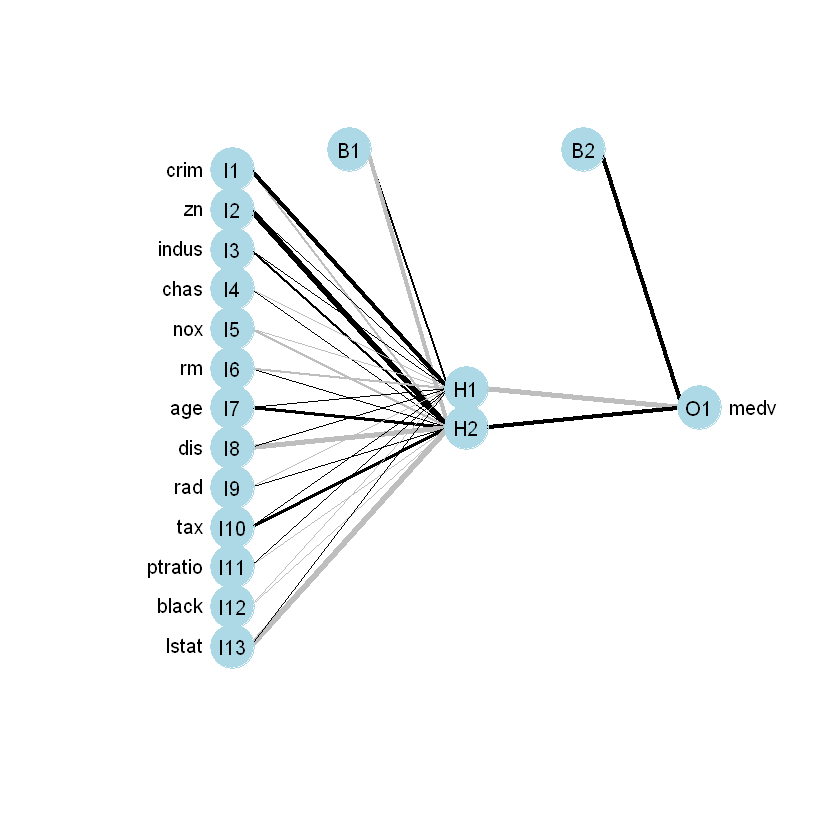

In [56]:
plot.nnet(nnet_model)

Здійснимо прогноз для тестової вибірки та повернемо значення до базового виміру:

In [57]:
test_predicted_scaled <- predict(nnet_model, test_data)
head(test_predicted_scaled)
test_nnet_predicted <- sapply(X = test_predicted_scaled, original = data$medv, FUN = revertData) %>% as.data.frame()

1,0.5002897
5,0.6030015
20,0.2798733
29,0.3302058
30,0.3558518
35,0.2345779


In [58]:
nnet_model

a 13-2-1 network with 31 weights
inputs: crim zn indus chas nox rm age dis rad tax ptratio black lstat 
output(s): medv 
options were -

Порівняємо похибки по лінійній регресії та нейронних мереж:

In [59]:
nnet_err <- data.frame(
  R2_train = round(cor(train_data$medv, predict(nnet_model, new=train_data))^2, 4),
  R2_test = round(cor(test_data$medv, test_predicted_scaled)^2, 4),
  MSE_test = round(mse(test_data$medv, test_predicted_scaled), 4),
  RMSE_test = round(rmse(test_data$medv, test_predicted_scaled), 4)  
)

rownames(nnet_err) <- "nnet"
linear_err |> bind_rows(neuralnet_err) |> bind_rows(neuralnet2_err) |> bind_rows(nnet_err)

# neuralnet wins! but remember it has more layers

,R2_train,R2_test,MSE_test,RMSE_test
,<dbl>,<dbl>,<dbl>,<dbl>
linear,0.7566,0.6611,0.0117,0.1081
neuralnet,1.0000,0.7799,0.0077,0.0876
neuralnet_caret,0.9767,0.8251,0.0063,0.0793
nnet,0.9148,0.7276,0.0103,0.1013


---

## Final models compare

Побудуємо графік розподілу пронозованих значень показників по усх моделях:

In [60]:
head(test_lm_predicted)
head(test_nn_predicted)
head(test_nnet_predicted)

,.
,<dbl>
1,30.55659
5,28.54003
20,18.27829
29,19.56211
30,21.01693
35,13.81993


,.
,<dbl>
1,28.74649
2,31.34932
3,18.86595
4,18.92882
5,19.89660
6,11.69719


,.
,<dbl>
1,27.51304
2,32.13507
3,17.59430
4,19.85926
5,21.01333
6,15.55600


In [61]:
test_medv <- subset(data, !split) |> select(medv) |> unlist()
head(test_medv)

medv1 medv2 medv3 medv4 medv5 medv6 
 24.0  36.2  18.2  18.4  21.0  13.5

In [62]:
head(test_data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
5,0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
20,0.0080867817,0.00,0.28152493,0,0.3148148,0.4150220,0.6858908,0.2425138,0.13043478,0.22900763,0.8936170,0.9849967,0.26352097,0.2933333
29,0.0086171860,0.00,0.28152493,0,0.3148148,0.5621767,0.9423275,0.3023670,0.13043478,0.22900763,0.8936170,0.9774068,0.30546358,0.2977778
30,0.0111962610,0.00,0.28152493,0,0.3148148,0.5964744,0.8692070,0.2827524,0.13043478,0.22900763,0.8936170,0.9579656,0.28283664,0.3555556
35,0.0180566727,0.00,0.28152493,0,0.3148148,0.4857252,0.9680742,0.2391765,0.13043478,0.22900763,0.8936170,0.6253215,0.51352097,0.1888889


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

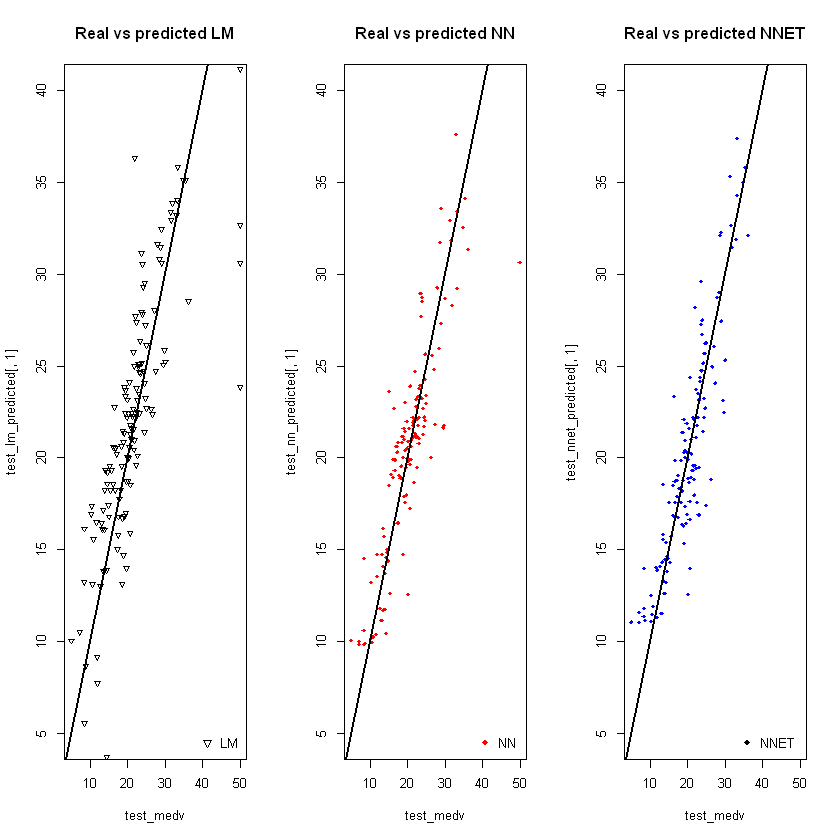

In [63]:
#Однакові межі для усіх графіків по Y
plot_ylim <- c(5,40)

par(mfrow=c(1,3)) # три стовпці, 1 рядок
# pch  - тип точки для графіку
plot(test_medv, test_lm_predicted[,1], col='black', ylim=plot_ylim, main='Real vs predicted LM', pch=25, cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='LM',pch=25,col='black', bty='n')

plot(test_medv,test_nn_predicted[,1], col='red', ylim=plot_ylim, main='Real vs predicted NN',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='NN',pch=18,col='red', bty='n')

plot(test_medv,test_nnet_predicted[,1], col='blue', ylim=plot_ylim, main='Real vs predicted NNET',pch=18,cex=0.7)
abline(0,1,lwd=2)

legend('bottomright',legend='NNET',pch=18, col='black', bty='n')


Combine all to one chart:

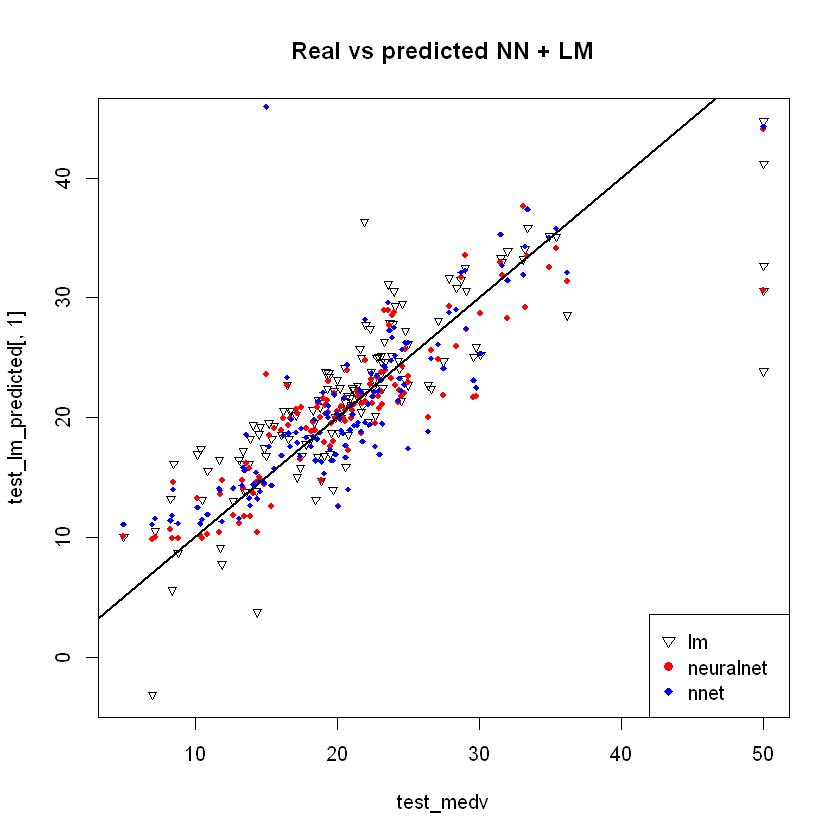

In [64]:
par(mfrow=c(1,1))

plot(test_medv,test_lm_predicted[,1],col='black',main='Real vs predicted NN + LM',pch=25,cex=0.7)
points(test_medv,test_nn_predicted[,1],col='red',pch=19,cex=0.7)
points(test_medv,test_nnet_predicted[,1],col='blue',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend=c('lm','neuralnet','nnet'),pch=c(25,19,18),col=c('black', 'red','blue'))

---

## Валідація моделі на різних розмірах вибірки

In [65]:
suppressMessages(library(boot))
suppressMessages(library(plyr))
suppressMessages(library(DMwR))

set.seed(2023)
errors <- data.frame(TrainSize = c(1:90), RMSE1 = c(0), RMSE2 = c(0))

for(i in 1:10) {

    for(j in 1:90){
  
      split <- c(1:(nrow(scaled_data)*j/100))
  
      train_data <- scaled_data[split,]
      test_data <- scaled_data[-split,]
  
      nnet_model <- nnet(formula, data = train_data,  size = 3, maxit = 100, trace = F)
  
      nnet_predicted_prob_scaled <- predict(nnet_model, test_data)
      nnet_predicted <- nnet_predicted_prob_scaled * (max(data$medv) - min(data$medv)) + min(data$medv)
  
      errors_list <- regr.eval(test_data$medv, nnet_predicted)
  
      errors[errors$TrainSize == j, ]$RMSE1 <- errors[errors$TrainSize == j, ]$RMSE1 + errors_list[3]
    }
}



Attaching package: 'boot'


The following object is masked from 'package:lattice':

    melanoma


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:reshape':

    rename, round_any


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'DMwR'


The following object is masked from 'package:plyr':

    join


The following object is masked from 'package:modelr':

    bootstrap




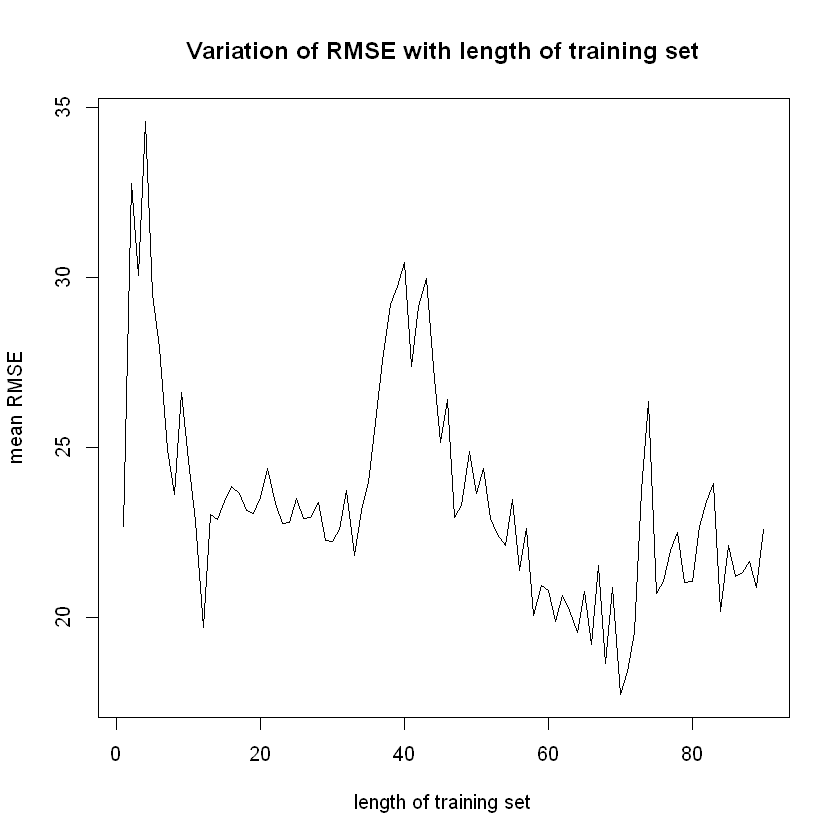

In [66]:
errors$RMSE1 <- errors$RMSE1/10
plot (x = errors$TrainSize, 
      y = errors$RMSE1, 
      ylim = c(min(errors$RMSE1), 
               max(errors$RMSE1)), 
      type = "l", 
      xlab = "length of training set", 
      ylab = "mean RMSE", 
      main = "Variation of RMSE with length of training set")

In [67]:
for(i in 1:10) {
  
  for(j in 1:90){
    
    split <- sample.split(scaled_data$medv, SplitRatio = j/100)
    
    train_data <- subset(scaled_data, split == TRUE)
    test_data <- subset(scaled_data, split == FALSE)
    
    nnet_model <- nnet(formula, data = train_data,  size = 3, maxit = 100, trace = F)
    
    nnet_predicted_prob_scaled <- predict(nnet_model, test_data)
    nnet_predicted <- nnet_predicted_prob_scaled * (max(data$medv) - min(data$medv)) + min(data$medv)
      
    errors_list <- regr.eval(test_data$medv, nnet_predicted)
    
    errors[errors$TrainSize == j, ]$RMSE2 <- errors[errors$TrainSize == j, ]$RMSE2 + errors_list[3]
  }
}

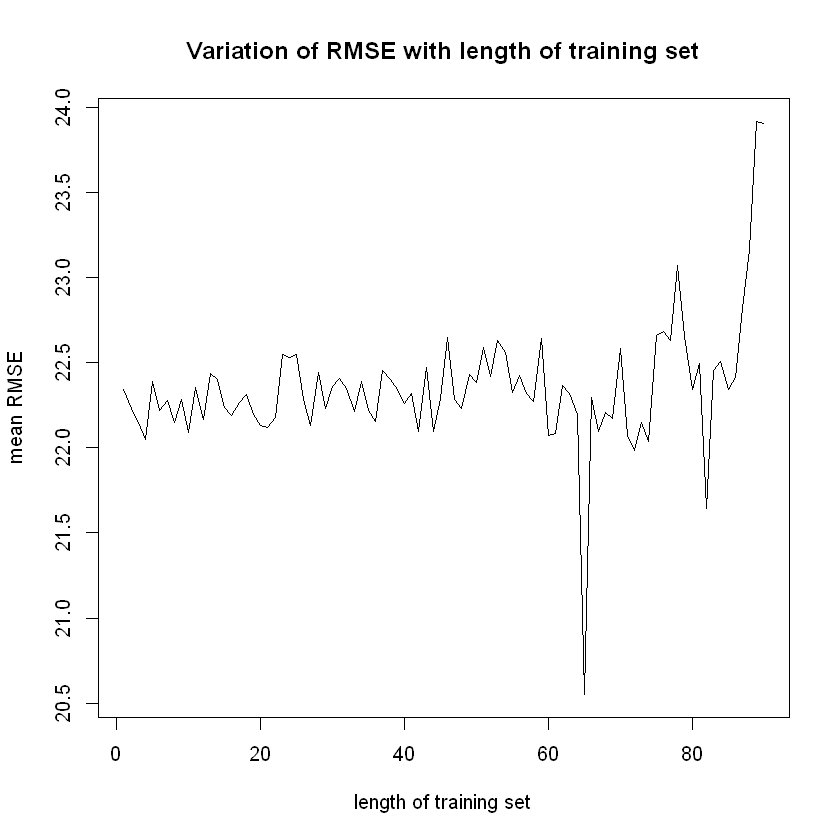

In [68]:
errors$RMSE2 <- errors$RMSE2/10
plot (x = errors$TrainSize, 
      y = errors$RMSE2, 
      ylim = c(min(errors$RMSE2), 
               max(errors$RMSE2)), 
      type = "l", 
      xlab = "length of training set", 
      ylab = "mean RMSE", 
      main = "Variation of RMSE with length of training set")

In [69]:
head(errors)

,TrainSize,RMSE1,RMSE2
,<int>,<dbl>,<dbl>
1,1,22.65845,22.34442
2,2,32.76667,22.23155
3,3,30.06977,22.14714
4,4,34.59365,22.05084
5,5,29.49516,22.39201
6,6,27.93207,22.22010


---

In [70]:
require(caret)

In [71]:
folds <- createFolds(scaled_data$medv, k = 10, list = TRUE, returnTrain = FALSE)
errors2 <- data.frame(FoldExcluded = c(1:10), RMSE = c(0))

In [72]:
folds

$Fold01
 [1]  16  20  21  39  46  47  48  56  69  91 120 127 132 143 151 186 187 191 196
[20] 227 231 236 239 252 258 259 279 280 289 314 320 335 337 350 352 360 372 373
[39] 380 385 392 409 415 419 420 431 439 445 452 468 484 486

$Fold02
 [1]   5  15  22  23  33  34  35  52  79  80  88  97  98 126 130 135 160 168 184
[20] 205 230 243 253 261 263 267 270 273 304 313 319 354 366 387 389 411 422 423
[39] 440 451 454 463 467 478 480 482 483 498 504

$Fold03
 [1]   4  17  26  38  53  70  71  82  86 100 104 128 133 134 141 147 201 208 209
[20] 212 214 217 224 246 269 274 305 325 326 332 341 348 353 355 356 362 365 369
[39] 370 377 382 390 400 404 407 408 417 418 470 495 501

$Fold04
 [1]   3   9  28  68  72  77  87  89  93  95 131 139 140 144 163 195 197 204 213
[20] 229 233 248 254 284 290 291 299 300 301 303 316 317 318 327 329 333 339 342
[39] 346 349 351 363 391 393 399 406 426 441 450 472 473 476

$Fold05
 [1]  55  76  85  94 113 117 118 125 142 156 157 159 167 170 172 179 189 190 192
[20] 194 203 221 240 262 272 285 286 310 324 330 338 344 358 368 371 388 414 425
[39] 427 429 434 449 459 475 493 497 500 503 505

$Fold06
 [1]  11  13  14  41  42  45  57  62  63 106 108 114 116 119 121 136 137 153 171
[20] 176 177 199 202 207 215 223 226 234 235 244 257 281 282 288 292 302 307 312
[39] 334 336 379 395 413 428 433 435 444 446 453 456 485

$Fold07
 [1]   1   7  10  12  27  30  40  58  60  73  74  78  81  83  92  96 152 154 158
[20] 162 169 206 210 216 218 237 242 245 249 260 266 276 293 295 311 321 345 347
[39] 357 378 383 386 405 424 438 447 448 455 457 458 460

$Fold08
 [1]   8  24  29  32  43 102 105 110 111 112 123 124 146 149 165 166 173 175 181
[20] 183 200 220 222 225 247 251 264 271 278 283 287 296 297 331 340 359 364 376
[39] 394 398 432 443 461 469 479 488 490 491 496 506

$Fold09
 [1]   6  18  19  25  36  50  54  59  61  66  90  99 103 107 109 155 161 164 174
[20] 178 180 182 198 211 219 250 265 275 306 328 361 367 375 381 384 396 397 402
[39] 403 412 416 437 442 464 465 466 471 477 481 502

$Fold10
 [1]   2  31  37  44  49  51  64  65  67  75  84 101 115 122 129 138 145 148 150
[20] 185 188 193 228 232 238 241 255 256 268 277 294 298 308 309 315 322 323 343
[39] 374 401 410 421 430 436 462 474 487 489 492 494 499

In [73]:
for(i in 1:10) {
  
  for(j in 1:10){    
    train_data <- scaled_data[-folds[[j]], ]
    test_data <- scaled_data[folds[[j]], ]
    
    nnet_model <- nnet(formula, data = train_data, trace = F,  size = 3, maxit = 100)
    
    nnet_predicted_prob_scaled <- predict(nnet_model, test_data)
    nnet_predicted <- nnet_predicted_prob_scaled * (max(data$medv) - min(data$medv)) + min(data$medv)
    errors_list <- regr.eval(test_data$medv, nnet_predicted)
    errors2[errors2$FoldExcluded == j, ]$RMSE <- errors2[errors2$FoldExcluded == j, ]$RMSE + errors_list[3]
  }
}

,FoldExcluded,RMSE
,<int>,<dbl>
1,1,23.88887
2,2,24.57703
3,3,24.03482
4,4,25.52928
5,5,24.05225
6,6,24.70978


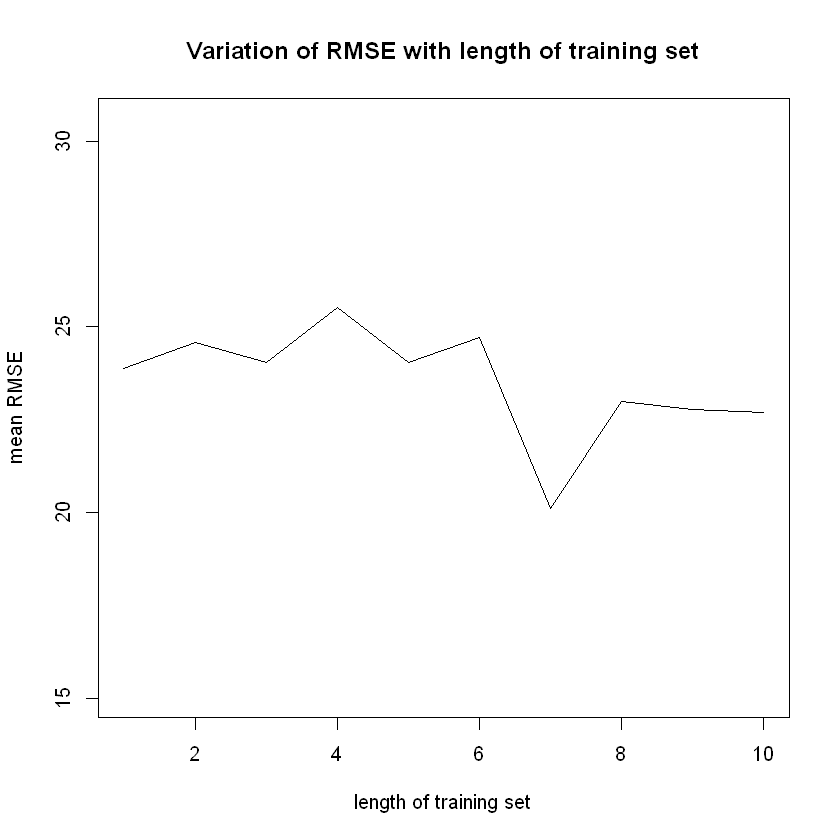

In [74]:
errors2$RMSE <- errors2$RMSE/10
plot (x = errors2$FoldExcluded, y = errors2$RMSE, 
      ylim = c(min(errors2$RMSE)-5, 
               max(errors2$RMSE)+5), 
      type = "l", 
      xlab = "length of training set", 
      ylab = "mean RMSE", 
      main = "Variation of RMSE with length of training set")
head(errors2)

---

# References

1. Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

2. Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.
